In [2]:
#kaggle _setup
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
#mounting the drive in colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#download the datasets
!kaggle datasets download -d valakhorasani/mobile-device-usage-and-user-behavior-dataset


Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
License(s): apache-2.0
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 14.6MB/s]


In [5]:
#unzip the dataser
!unzip mobile-device-usage-and-user-behavior-dataset.zip

Archive:  mobile-device-usage-and-user-behavior-dataset.zip
  inflating: user_behavior_dataset.csv  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [7]:
dataset = pd.read_csv("/content/user_behavior_dataset.csv")
dataset.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [8]:
dataset.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [9]:
dataset.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [10]:
dataset["User Behavior Class"].unique()

array([4, 3, 2, 5, 1])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [12]:
print(dataset["Device Model"].unique())
print(dataset["Operating System"].unique())
print(dataset["Gender"].unique())



['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
['Android' 'iOS']
['Male' 'Female']


In [13]:
#label encoding
map_deviceModel = { 'Google Pixel 5' :0, 'OnePlus 9': 1, 'Xiaomi Mi 11' : 2, 'iPhone 12' : 3,
 'Samsung Galaxy S21' : 4 }

map_operatingSystem = {'Android' : 0, 'iOS' : 1 }

map_Gender = { 'Male' :1 , 'Female' : 0}


In [14]:
dataset["Device Model"]= dataset["Device Model"].map(map_deviceModel)
dataset["Operating System"]= dataset["Operating System"].map(map_operatingSystem)
dataset["Gender"]= dataset["Gender"].map(map_Gender)

In [15]:
dataset.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,2,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,3,1,187,4.3,1367,58,988,31,0,3


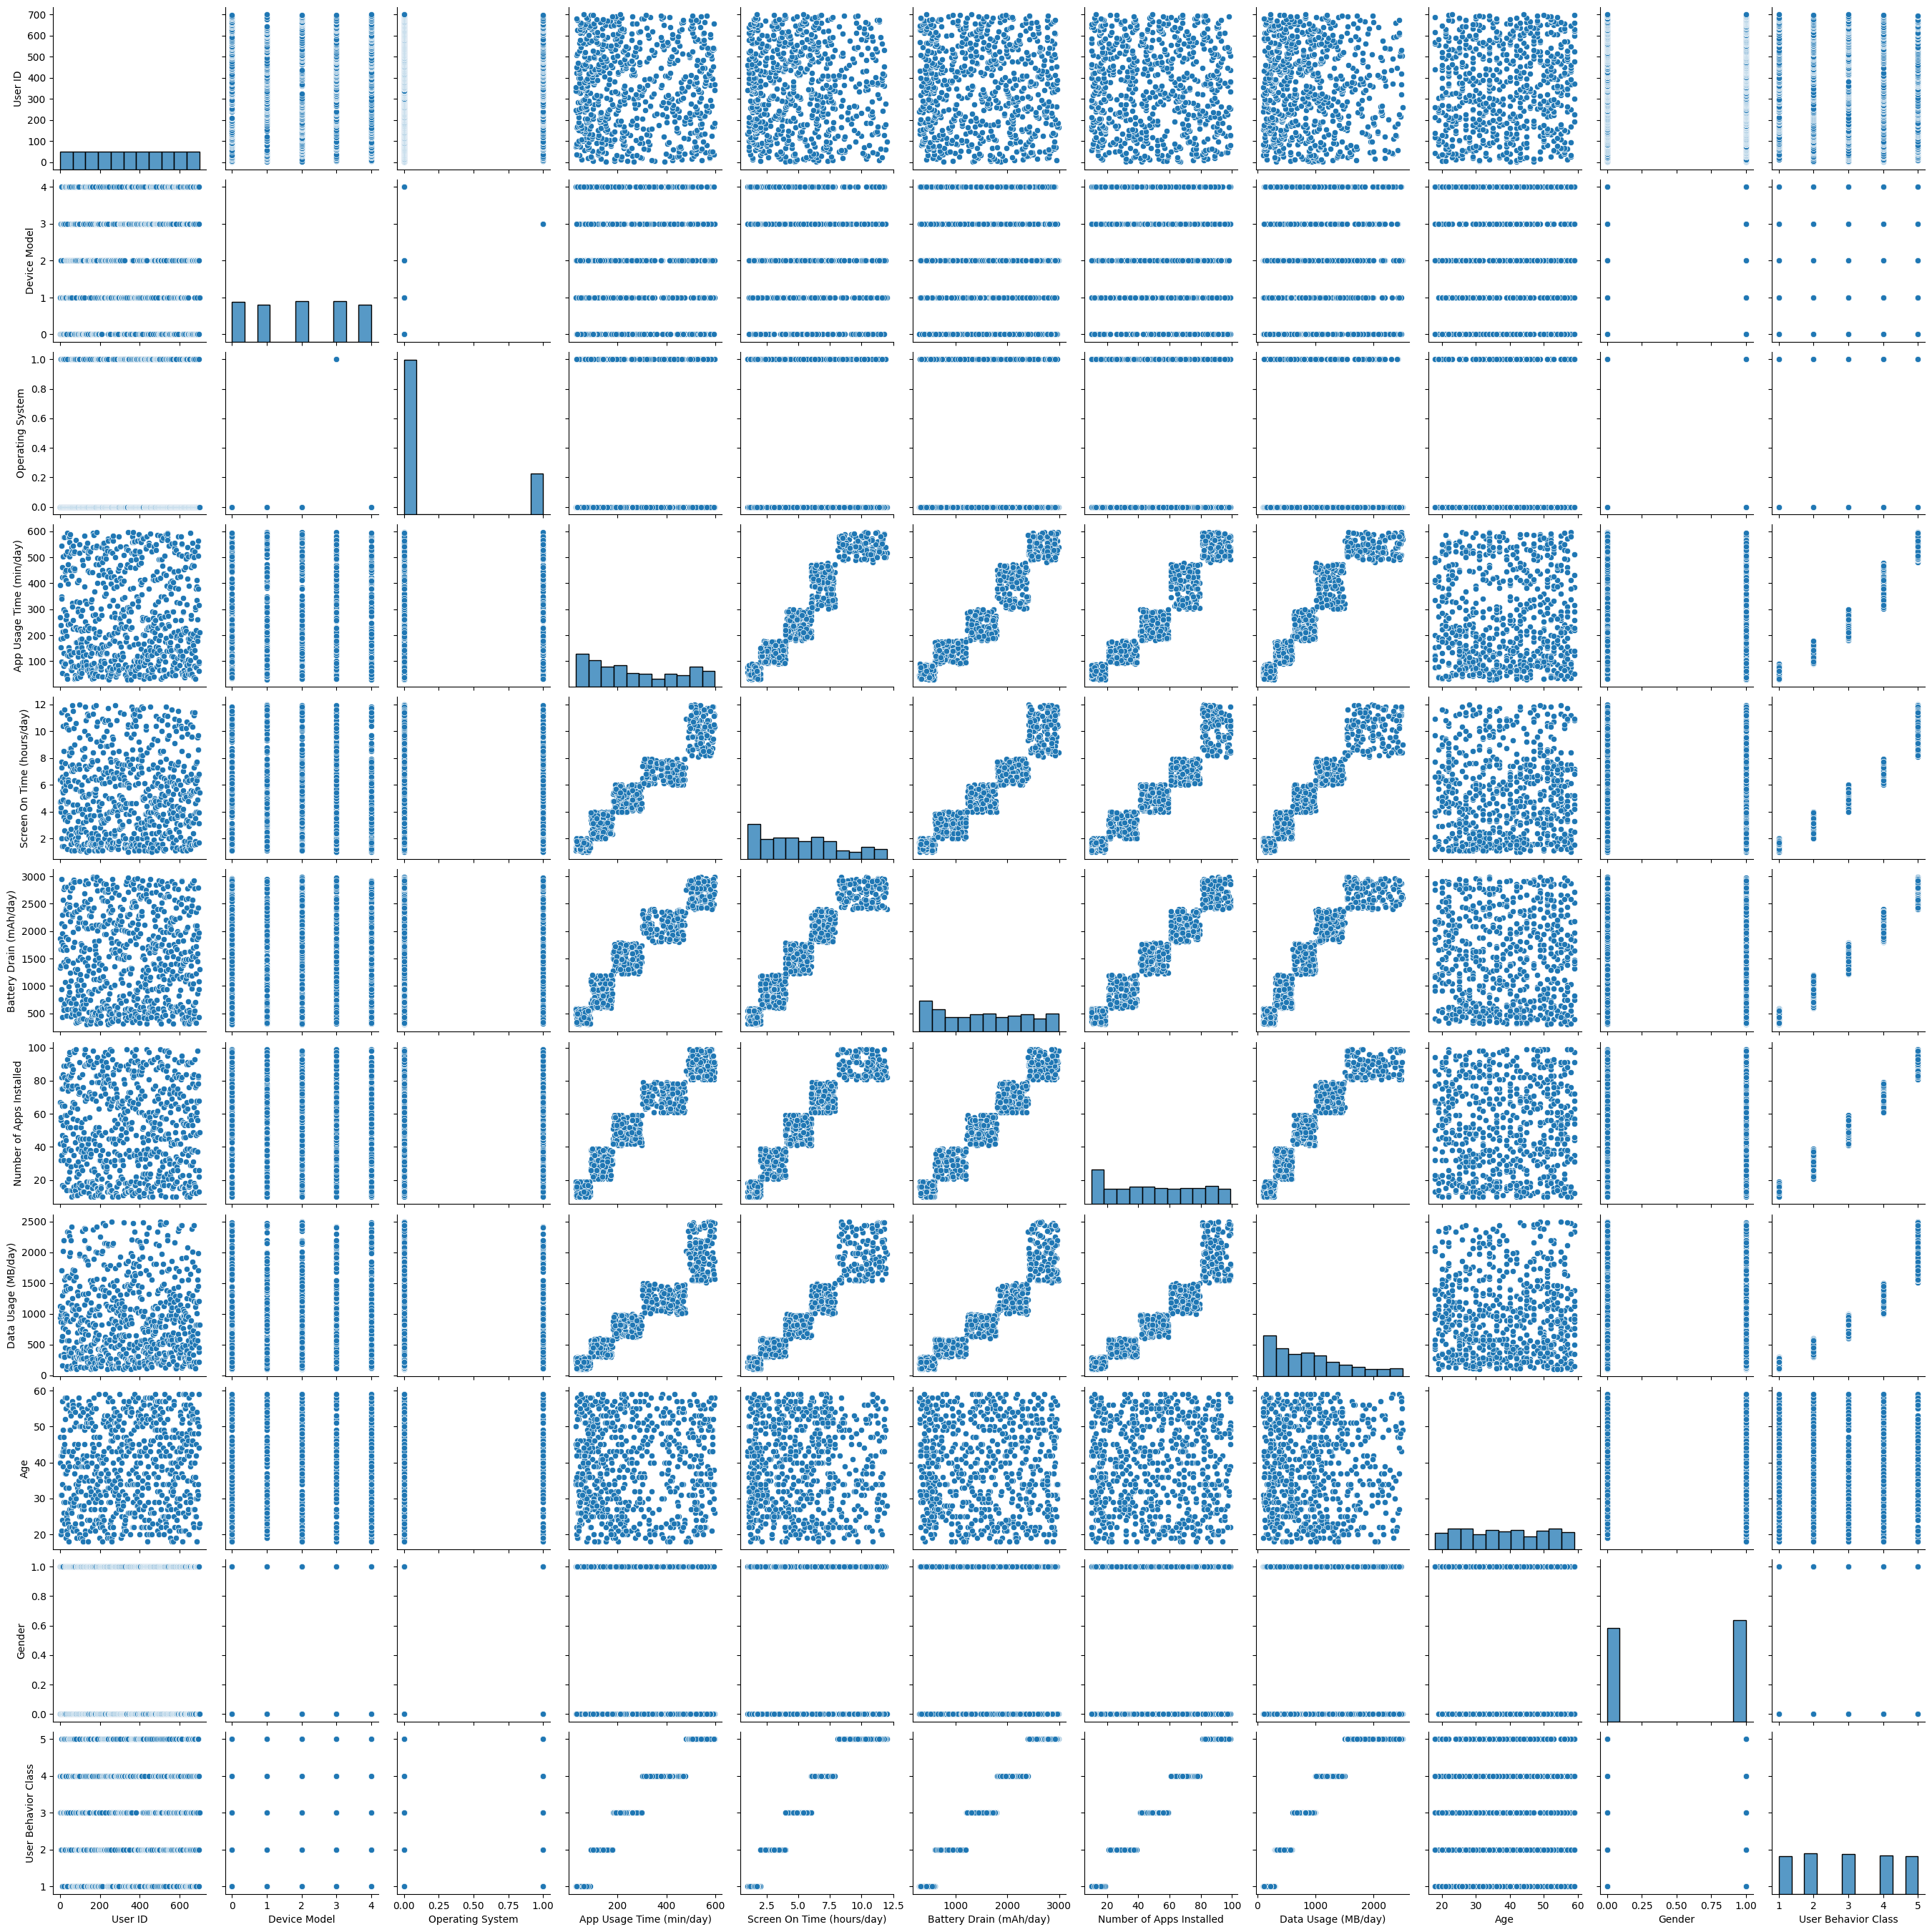

In [16]:
new_var = sns.pairplot(dataset)

<Axes: >

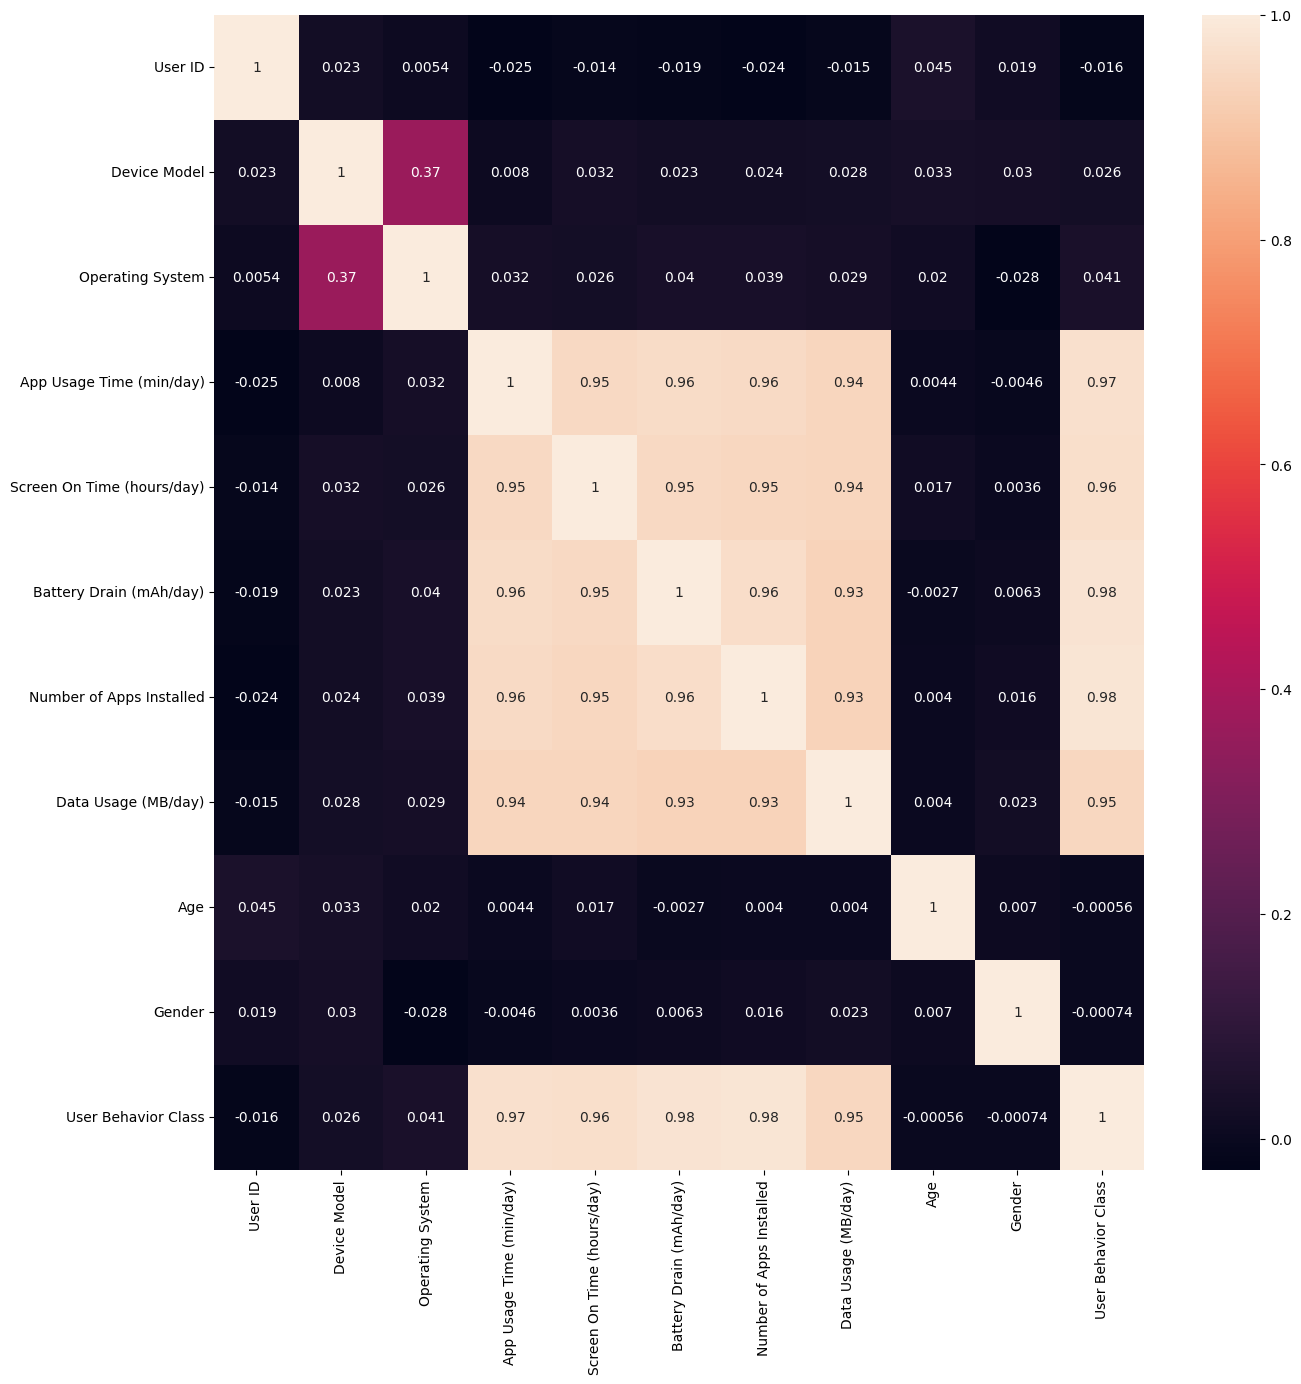

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(dataset.corr(), annot=True)

**Concluson:**

User Behaviour class is the output, in this case. Correlation defines how the different factors are inter-related to each other. **User ID, Device Model, Operating System, Age and Gender** have very **low correlation value**, so there is not much effect of these factos in the User Behaviour Class.

In [25]:
dataset.columns


Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

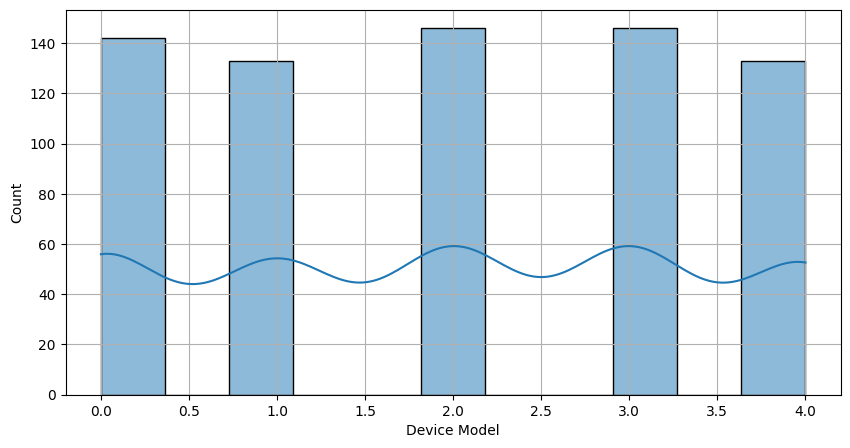

In [27]:
plt.figure(figsize= (10,5))
sns.histplot(data=dataset, x='Device Model', kde=True)
plt.grid()
plt.show()

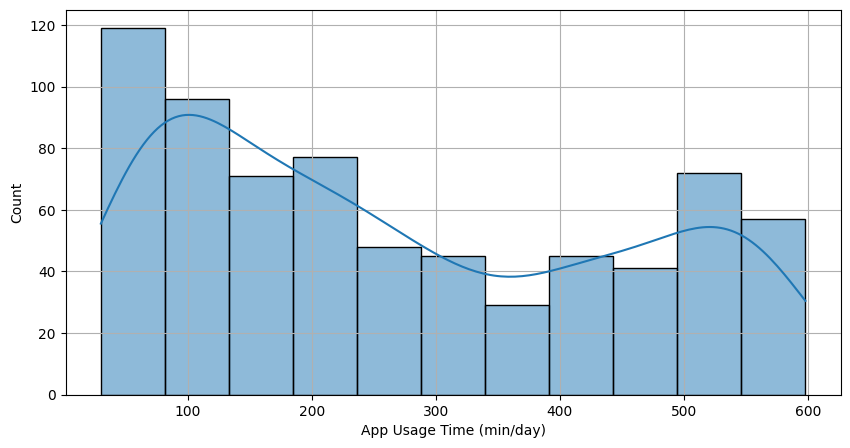

In [28]:
plt.figure(figsize= (10,5))
sns.histplot(data=dataset, x='App Usage Time (min/day)', kde=True)
plt.grid()
plt.show()

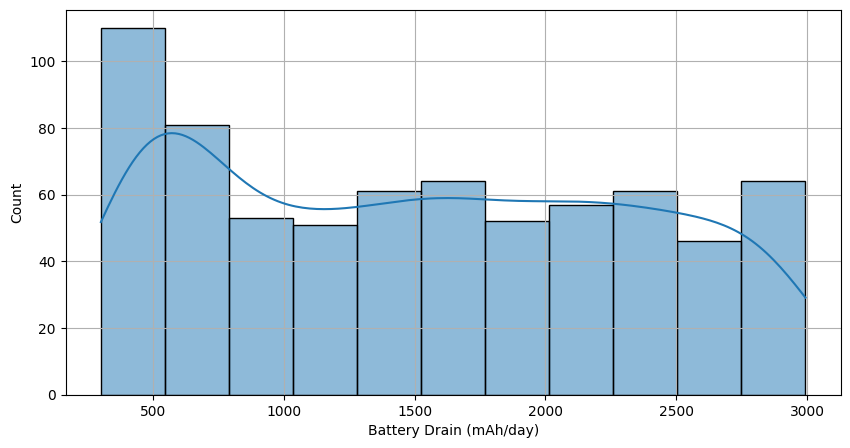

In [30]:
plt.figure(figsize= (10,5))
sns.histplot(data=dataset, x='Battery Drain (mAh/day)', kde=True)
plt.grid()
plt.show()

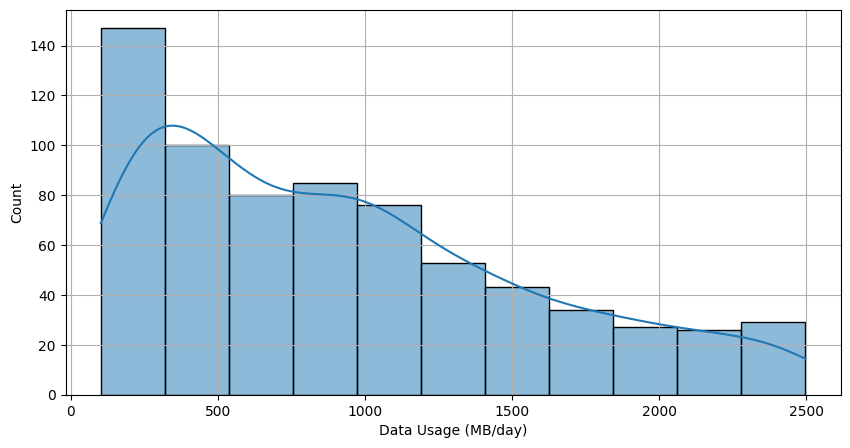

In [32]:
plt.figure(figsize= (10,5))
sns.histplot(data=dataset, x='Data Usage (MB/day)', kde=True)
plt.grid()
plt.show()

#**Training the Model**

In [39]:
#spliting the dataset into input and output

input = dataset.drop(["User Behavior Class"], axis=1)
output = dataset["User Behavior Class"]


In [40]:
#train_test_split

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

#**Logistic Regression Model**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

#train
lr = LogisticRegression()
lr.fit(x_train, y_train)

#save_model
joblib.dump(lr, 'logistic_regression_model.pkl')

#predict
y_pred = lr.predict(x_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.5642857142857143
Confusion Matrix:
 [[17 10  0  0  0]
 [ 3 16  6  4  0]
 [ 0  6 20  7  1]
 [ 0  0  8 12  7]
 [ 0  0  0  9 14]]
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.63      0.72        27
           2       0.50      0.55      0.52        29
           3       0.59      0.59      0.59        34
           4       0.38      0.44      0.41        27
           5       0.64      0.61      0.62        23

    accuracy                           0.56       140
   macro avg       0.59      0.56      0.57       140
weighted avg       0.59      0.56      0.57       140



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**SVM Model**

In [42]:
from sklearn.svm import SVC

#model
svm_model = SVC(kernel='linear' , probability = True)
svm_model.fit(x_train, y_train)

#save_model
joblib.dump(svm_model, 'svm_model.pkl')

#predict
y_pred = svm_model.predict(x_test)

#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9928571428571429
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 23]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.99        34
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



#**Random Forest Model**

In [46]:
from sklearn.ensemble import RandomForestClassifier

#model
forest_model = RandomForestClassifier(n_estimators=5, random_state=42)
forest_model.fit(x_train, y_train)

#save_model
joblib.dump(forest_model, 'random_forest_model.pkl')

#predict
y_pred = forest_model.predict(x_test)

#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



#**KNN Model**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

#model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

#save_model
joblib.dump(knn_model, 'knn_model.pkl')

#predict
y_pred = knn_model.predict(x_test)

#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9928571428571429
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 23]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.99        34
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

